<a href="https://colab.research.google.com/github/zahra-zarrabi/RNN/blob/main/Ball_Move_Direction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SimpleRNN, GRU, LSTM, Dense, Flatten,TimeDistributed
import matplotlib.pyplot as plt


In [2]:
dataset_size = 20
number_of_frames = 30
width = 40
height = 20
step = 1

In [3]:
def generate_data():
  labels = []
  data = []
  label = random.choice((0, 1))
  for _ in range(dataset_size):
    frames = []
    if label == 0: # move to left
      x = random.randint(number_of_frames + step, width)
      y = random.randint(0, height)

      for i in range(number_of_frames):
        frame = np.zeros((height, width))
        cv2.circle(frame,(x, y), 2, 255, -1)
        x -= step
        y = random.randint(0, height)
        frames.append(frame)
      labels.append(label)

    elif label == 1:
      x = random.randint(0, width-number_of_frames-step)
      y = random.randint(0,height)

      for i in range(number_of_frames):
        frame = np.zeros((height, width))
        cv2.circle(frame,(x,y), 2,255, -1)
        x += step
       
        frames.append(frame)
      labels.append(label)

    data.append(frames)
  
  data = np.array(data)
  labels = np.array(labels)
  data = data[..., np.newaxis]
  labels = labels[..., np.newaxis]
  return data, labels

In [4]:
data, labels = generate_data()

print(data.shape)
print(labels.shape)

(20, 30, 20, 40, 1)
(20, 1)


0


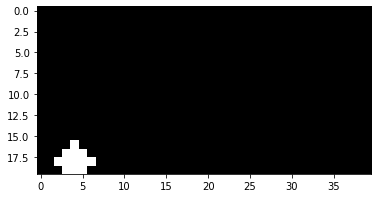

1


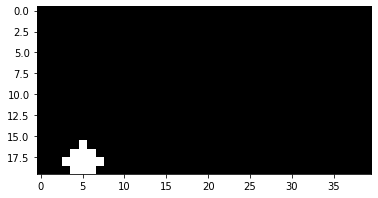

2


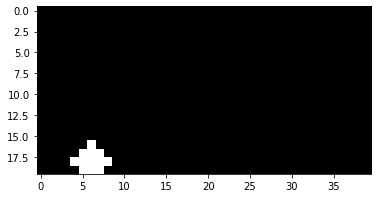

3


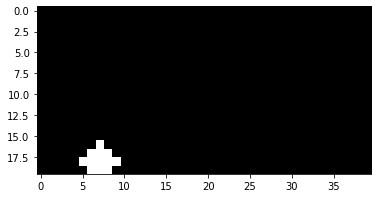

4


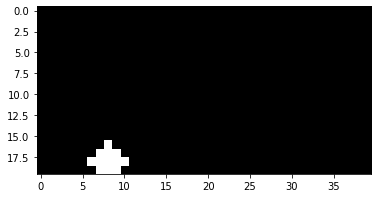

5


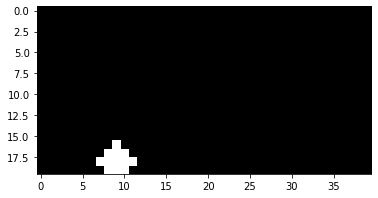

6


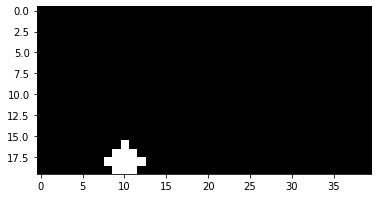

7


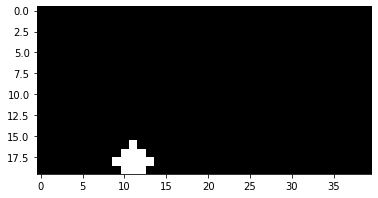

8


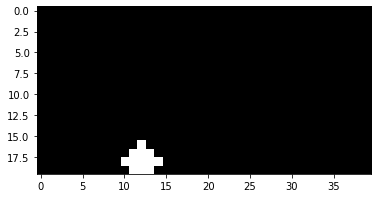

9


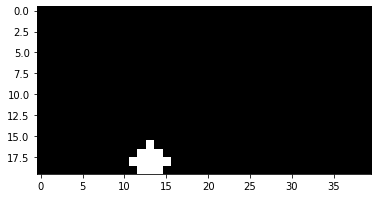

10


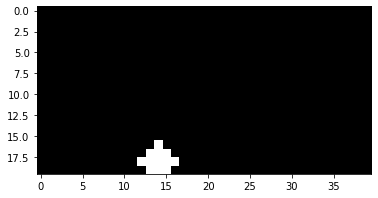

11


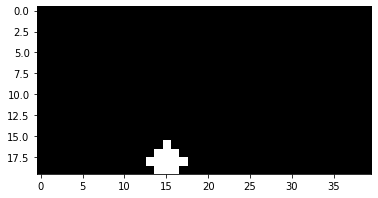

12


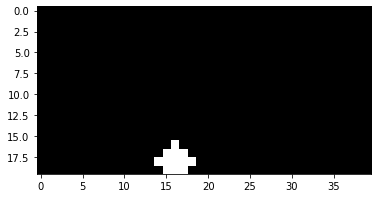

13


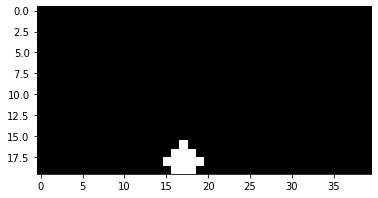

14


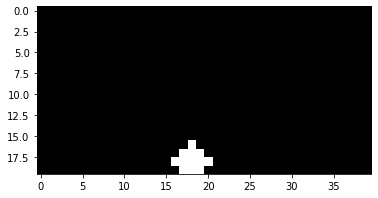

15


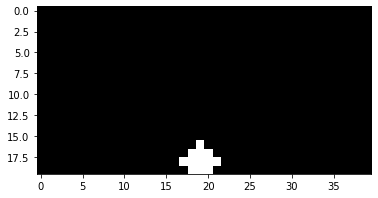

16


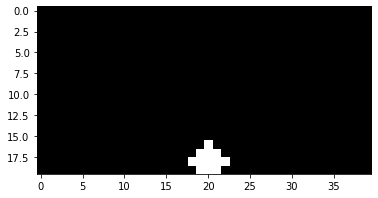

17


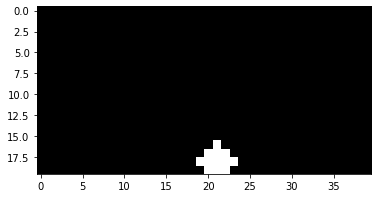

18


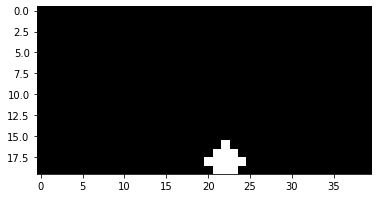

19


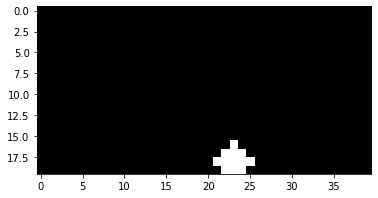

20


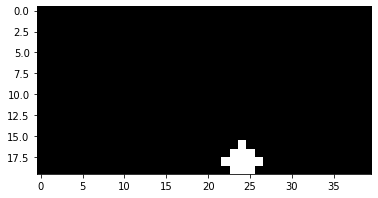

21


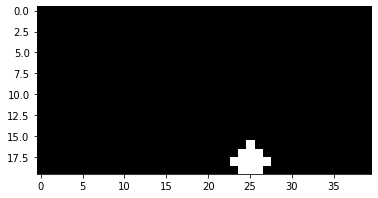

22


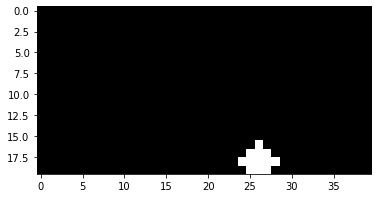

23


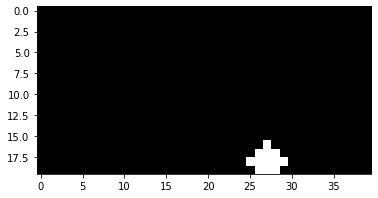

24


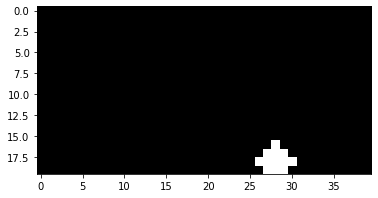

25


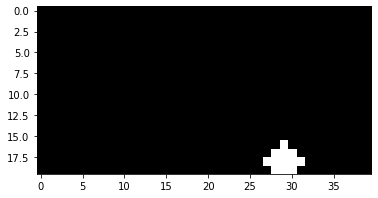

26


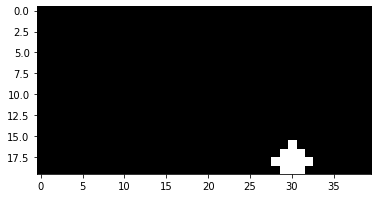

27


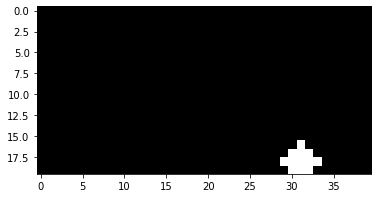

28


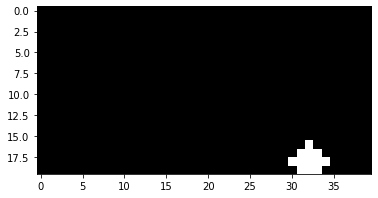

29


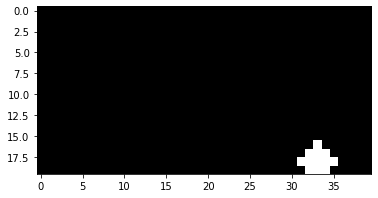

In [5]:
from IPython.display import clear_output
for num_frame in range(data.shape[1]):
  print(num_frame)
  # clear_output(wait=True)
  plt.imshow(data[0, num_frame, :, :, 0], cmap='gray')
  plt.show()

In [14]:
model = tf.keras.models.Sequential([
                                    #CNN
                                    TimeDistributed(Conv2D(2,(3,3),activation='relu',input_shape=(None,height,width,1))),
                                    TimeDistributed(MaxPooling2D(pool_size=(2,2))),
                                    TimeDistributed(Flatten()),

                                    #RNN
                                    LSTM(50),
                                    Dense(2,activation='softmax')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [16]:
model.fit(data,labels, batch_size=32, epochs=3)

Epoch 1/3
1/1 [==============================] - 3s 3s/step - loss: 1.0642 - accuracy: 0.2500
Epoch 2/3
1/1 [==============================] - 0s 117ms/step - loss: 0.7870 - accuracy: 0.5500
Epoch 3/3
1/1 [==============================] - 0s 114ms/step - loss: 0.6010 - accuracy: 0.7000


# GRU


In [13]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 539ms/step - loss: 0.8127 - accuracy: 0.5000


[0.8126584887504578, 0.5]

# LSTM

In [17]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 649ms/step - loss: 0.8626 - accuracy: 0.4000


[0.8625520467758179, 0.4000000059604645]

# SimpleRNN

In [9]:
x_test,y_test = generate_data()

model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 309ms/step - loss: 1.3544 - accuracy: 0.3000


[1.3544490337371826, 0.30000001192092896]